In [1]:
import cv2 # compter vision
import mediapipe as mp # responsable de la detection des doigts et main 
import tensorflow as tf
from matplotlib import pyplot as plt


In [2]:
mp_mains = mp.solutions.hands
mp_dessin = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# à travers cela on crée des raccourcis vers des modules de mediapipe

In [3]:
Mains = mp_mains.Hands(model_complexity=0,min_detection_confidence=0.5,min_tracking_confidence=0.5)
# on initialise un objet Mains qu'on va utiliser plus tard. Les paramètres sont ceux du modele de deep learning de la lib mediapipe

In [4]:
cap = cv2.VideoCapture(0) 
#cap est un objet capable de lire l'output de la webcam numéro 0

In [5]:
ret, image = cap.read() # cap.read() renvoie deux variables ret : True ou False et image qui comporte l'image

In [6]:
resultats = Mains.process(image) # the magic happens here : c'est la que le modèle travaille et effectue la prediction

In [7]:
resultats # le résultat est de ce type faut comprendre comment l'intépréter

mediapipe.python.solution_base.SolutionOutputs

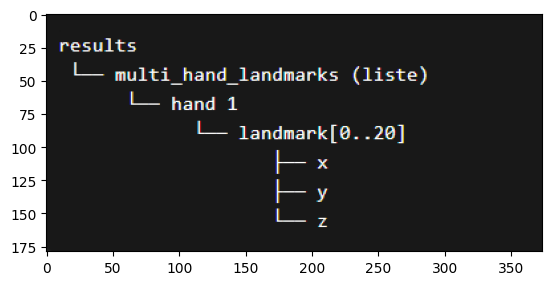

In [8]:
explication = tf.io.read_file('explication.png')
explication = tf.io.decode_jpeg(explication)
plt.imshow(explication)

In [9]:
print(resultats.multi_hand_landmarks) # ça veut dire aucune main n'a été détéctée

None


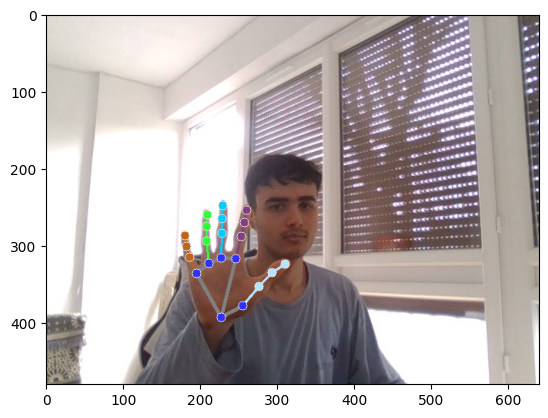

In [10]:
#maintenant on peut commencer notre boucle : 
while cap.isOpened():
    ret, image = cap.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # OpenCV lit du BGR mais MediaPipe attend du RGB
    results = Mains.process(image)
    if results.multi_hand_landmarks: #si le résultat n'est pas null
        for hand_landmarks in results.multi_hand_landmarks: # on parcourt les éléments de la liste results.multi_hand_landmarks
            mp_dessin.draw_landmarks(image,hand_landmarks,mp_mains.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),mp_drawing_styles.get_default_hand_connections_style())
            # on affiche des points sur nos doigts grace à draw_landmarks
        
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imshow("Hand Tracking", image)       
    # Pour pouvoir sortir de la boucle        
    if cv2.waitKey(5) & 0XFF == ord('q'):
                break     
    # notre programme marche bien on peut afficher un petit exemple

    if cv2.waitKey(5) & 0XFF == ord('a'):
        image_a_afficher = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_a_afficher)
    
    
cap.release() # pour fermer la cam
cv2.destroyAllWindows()

 